# Step 1

In [586]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hasan\Downloads\datasets\datasets\penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Step 2

In [324]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [325]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [326]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [327]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [328]:
df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [329]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [330]:
df.sex.unique()

array(['male', 'female'], dtype=object)

# Step 3

In [331]:
df.loc[df['species']=="Adelie", 'species'] = 1
df.loc[df['species']=="Gentoo", 'species'] = 2
df.loc[df['species']=="Chinstrap", 'species'] = 3

In [332]:
#df.loc[df['island']=="Torgersen", 'island'] = 1
#df.loc[df['island']=="Biscoe", 'island'] = 2
#df.loc[df['island']=="Dream", 'island'] = 3

In [333]:
df.loc[df['island']=="Torgersen", 'island'] = 1
df.loc[df['island']=="Biscoe", 'island'] = 0
df.loc[df['island']=="Dream", 'island'] = 0

In [334]:
df.loc[df['sex']=="male", 'sex'] = 1
df.loc[df['sex']=="female", 'sex'] = 2

In [335]:
print(df.species.unique())
print(df.island.unique())
print(df.sex.unique())

[1 2 3]
[1 0]
[1 2]


In [336]:
df['island'] = df['island'].astype("int")
df['species'] = df['species'].astype(int)
df['sex'] = df['sex'].astype("int")

In [337]:
df.dtypes

species                int32
island                 int32
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int32
year                   int64
dtype: object

# Step 4

In [338]:
non_categorial_col=("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g")
for i in non_categorial_col:
    maximum=df[i].max()
    minimum=df[i].min()
    print(f"{i}: Max is {maximum} and Min is {minimum}")

bill_length_mm: Max is 59.6 and Min is 32.1
bill_depth_mm: Max is 21.5 and Min is 13.1
flipper_length_mm: Max is 231.0 and Min is 172.0
body_mass_g: Max is 6300.0 and Min is 2700.0


In [339]:
for i in non_categorial_col:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [340]:
for i in non_categorial_col:
    maximum=df[i].max()
    minimum=df[i].min()
    print(f"{i}: Max is {maximum} and Min is {minimum}")

bill_length_mm: Max is 1.0 and Min is 0.0
bill_depth_mm: Max is 1.0 and Min is 0.0
flipper_length_mm: Max is 1.0 and Min is 0.0
body_mass_g: Max is 1.0 and Min is 0.0


# Step 5,6,7,8

In [341]:
df.drop("year",axis=1,inplace=True)

In [479]:
import numpy as np
def train_test_split(df):
    train_index = np.random.rand(len(df)) < 0.8
    train_data = df[train_index]
    test_data = df[~train_index]
    train_x=train_data.drop("island",axis=1)
    test_x=test_data.drop("island",axis=1)
    train_y=train_data["island"]
    test_y=test_data["island"]
    return(train_x,train_y,test_x,test_y)

In [480]:
train_x,train_y,test_x,test_y=train_test_split(df)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(263, 6)
(263,)
(70, 6)
(70,)


# Step 9

In [597]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, itr, learning_rate):
        self.learning_rate = learning_rate
        self.itr = itr
        self.weights = None
        self.bias = None
        self.loss = []
        self.we = []
        self.bi = []

    def sigmoid(self, z):
        return(1/(1+ np.exp(-z)))

    def cost(self,train_y, y_predicted):
        return(-(1/train_y.shape[0])*(np.sum(train_y*np.log(y_predicted+ 1e-8)+ (1-train_y) *np.log(1-y_predicted+ 1e-8))))

    def gradient_descent(self,x_train,train_y, y_predicted):
        delta = y_predicted- train_y
        dW=np.dot(x_train.T,delta)/x_train.shape[0]
        db =np.sum(y_predicted- train_y)/train_y.shape[0]
        return (dW,db)

    def fit(self, x_train, train_y):
        self.weights=np.ones(x_train.shape[1])
        self.bias= 0
        for i in range(self.itr):
            z = np.dot(x_train,self.weights.T) +self.bias
            y_predicted= self.sigmoid(z)
            dW,db= self.gradient_descent(x_train,train_y, y_predicted)
            self.weights=self.weights-(self.learning_rate*dW)
            self.bias=self.bias-(db*self.learning_rate)
            cost=self.cost(train_y, y_predicted)
            
            self.loss.append(cost)
            print(f"For Iteration {i} the Loss is {round(self.loss[i],4)}.")
            self.we.append(self.weights)
            self.bi.append(self.bias)

    def predict(self, x_train):
        z=np.dot(x_train,self.weights.T)+ self.bias
        y_predicted=self.sigmoid(z)
        tmp=np.ones(x_train.shape[0])
        for i in range(x_train.shape[0]):
            if y_predicted[i]<.5:
                tmp[i]=0
            else:
                tmp[i]=1
            
        return(tmp)


In [541]:
def accuracy(y,y_predicted):
    acc=0
    n=y_predicted.shape[0]
    y_mat = np.array(y)
    for i in range(n):
        #print(y_mat[i],y_hat[0,i])
        if y_mat[i]==y_predicted[i]:
            acc+=1
        else:
            continue
    return(round(acc/n,2))

# Model 1

In [608]:
model1=LogisticRegression(learning_rate=.003, itr=5000)
model1.fit(train_x,train_y)
#t=model1.predict(test_x)

For Iteration 0 the Loss is 4.5526.
For Iteration 1 the Loss is 4.5358.
For Iteration 2 the Loss is 4.519.
For Iteration 3 the Loss is 4.5022.
For Iteration 4 the Loss is 4.4855.
For Iteration 5 the Loss is 4.4687.
For Iteration 6 the Loss is 4.4519.
For Iteration 7 the Loss is 4.4352.
For Iteration 8 the Loss is 4.4184.
For Iteration 9 the Loss is 4.4017.
For Iteration 10 the Loss is 4.3849.
For Iteration 11 the Loss is 4.3682.
For Iteration 12 the Loss is 4.3514.
For Iteration 13 the Loss is 4.3347.
For Iteration 14 the Loss is 4.318.
For Iteration 15 the Loss is 4.3013.
For Iteration 16 the Loss is 4.2846.
For Iteration 17 the Loss is 4.2679.
For Iteration 18 the Loss is 4.2512.
For Iteration 19 the Loss is 4.2345.
For Iteration 20 the Loss is 4.2178.
For Iteration 21 the Loss is 4.2011.
For Iteration 22 the Loss is 4.1845.
For Iteration 23 the Loss is 4.1678.
For Iteration 24 the Loss is 4.1511.
For Iteration 25 the Loss is 4.1345.
For Iteration 26 the Loss is 4.1179.
For Iteration

For Iteration 266 the Loss is 0.9858.
For Iteration 267 the Loss is 0.9796.
For Iteration 268 the Loss is 0.9734.
For Iteration 269 the Loss is 0.9673.
For Iteration 270 the Loss is 0.9613.
For Iteration 271 the Loss is 0.9553.
For Iteration 272 the Loss is 0.9494.
For Iteration 273 the Loss is 0.9436.
For Iteration 274 the Loss is 0.9378.
For Iteration 275 the Loss is 0.932.
For Iteration 276 the Loss is 0.9264.
For Iteration 277 the Loss is 0.9208.
For Iteration 278 the Loss is 0.9152.
For Iteration 279 the Loss is 0.9097.
For Iteration 280 the Loss is 0.9043.
For Iteration 281 the Loss is 0.8989.
For Iteration 282 the Loss is 0.8936.
For Iteration 283 the Loss is 0.8883.
For Iteration 284 the Loss is 0.8831.
For Iteration 285 the Loss is 0.878.
For Iteration 286 the Loss is 0.8729.
For Iteration 287 the Loss is 0.8678.
For Iteration 288 the Loss is 0.8628.
For Iteration 289 the Loss is 0.8579.
For Iteration 290 the Loss is 0.853.
For Iteration 291 the Loss is 0.8482.
For Iteration 2

For Iteration 550 the Loss is 0.4218.
For Iteration 551 the Loss is 0.4214.
For Iteration 552 the Loss is 0.421.
For Iteration 553 the Loss is 0.4206.
For Iteration 554 the Loss is 0.4203.
For Iteration 555 the Loss is 0.4199.
For Iteration 556 the Loss is 0.4195.
For Iteration 557 the Loss is 0.4191.
For Iteration 558 the Loss is 0.4187.
For Iteration 559 the Loss is 0.4183.
For Iteration 560 the Loss is 0.418.
For Iteration 561 the Loss is 0.4176.
For Iteration 562 the Loss is 0.4172.
For Iteration 563 the Loss is 0.4169.
For Iteration 564 the Loss is 0.4165.
For Iteration 565 the Loss is 0.4161.
For Iteration 566 the Loss is 0.4158.
For Iteration 567 the Loss is 0.4154.
For Iteration 568 the Loss is 0.4151.
For Iteration 569 the Loss is 0.4147.
For Iteration 570 the Loss is 0.4144.
For Iteration 571 the Loss is 0.414.
For Iteration 572 the Loss is 0.4137.
For Iteration 573 the Loss is 0.4133.
For Iteration 574 the Loss is 0.413.
For Iteration 575 the Loss is 0.4127.
For Iteration 57

For Iteration 858 the Loss is 0.3682.
For Iteration 859 the Loss is 0.3681.
For Iteration 860 the Loss is 0.3681.
For Iteration 861 the Loss is 0.368.
For Iteration 862 the Loss is 0.3679.
For Iteration 863 the Loss is 0.3679.
For Iteration 864 the Loss is 0.3678.
For Iteration 865 the Loss is 0.3677.
For Iteration 866 the Loss is 0.3677.
For Iteration 867 the Loss is 0.3676.
For Iteration 868 the Loss is 0.3675.
For Iteration 869 the Loss is 0.3675.
For Iteration 870 the Loss is 0.3674.
For Iteration 871 the Loss is 0.3673.
For Iteration 872 the Loss is 0.3673.
For Iteration 873 the Loss is 0.3672.
For Iteration 874 the Loss is 0.3671.
For Iteration 875 the Loss is 0.3671.
For Iteration 876 the Loss is 0.367.
For Iteration 877 the Loss is 0.367.
For Iteration 878 the Loss is 0.3669.
For Iteration 879 the Loss is 0.3668.
For Iteration 880 the Loss is 0.3668.
For Iteration 881 the Loss is 0.3667.
For Iteration 882 the Loss is 0.3666.
For Iteration 883 the Loss is 0.3666.
For Iteration 8

For Iteration 1164 the Loss is 0.3556.
For Iteration 1165 the Loss is 0.3555.
For Iteration 1166 the Loss is 0.3555.
For Iteration 1167 the Loss is 0.3555.
For Iteration 1168 the Loss is 0.3555.
For Iteration 1169 the Loss is 0.3554.
For Iteration 1170 the Loss is 0.3554.
For Iteration 1171 the Loss is 0.3554.
For Iteration 1172 the Loss is 0.3554.
For Iteration 1173 the Loss is 0.3553.
For Iteration 1174 the Loss is 0.3553.
For Iteration 1175 the Loss is 0.3553.
For Iteration 1176 the Loss is 0.3553.
For Iteration 1177 the Loss is 0.3552.
For Iteration 1178 the Loss is 0.3552.
For Iteration 1179 the Loss is 0.3552.
For Iteration 1180 the Loss is 0.3552.
For Iteration 1181 the Loss is 0.3551.
For Iteration 1182 the Loss is 0.3551.
For Iteration 1183 the Loss is 0.3551.
For Iteration 1184 the Loss is 0.3551.
For Iteration 1185 the Loss is 0.355.
For Iteration 1186 the Loss is 0.355.
For Iteration 1187 the Loss is 0.355.
For Iteration 1188 the Loss is 0.355.
For Iteration 1189 the Loss i

For Iteration 1402 the Loss is 0.3505.
For Iteration 1403 the Loss is 0.3505.
For Iteration 1404 the Loss is 0.3505.
For Iteration 1405 the Loss is 0.3505.
For Iteration 1406 the Loss is 0.3505.
For Iteration 1407 the Loss is 0.3505.
For Iteration 1408 the Loss is 0.3504.
For Iteration 1409 the Loss is 0.3504.
For Iteration 1410 the Loss is 0.3504.
For Iteration 1411 the Loss is 0.3504.
For Iteration 1412 the Loss is 0.3504.
For Iteration 1413 the Loss is 0.3503.
For Iteration 1414 the Loss is 0.3503.
For Iteration 1415 the Loss is 0.3503.
For Iteration 1416 the Loss is 0.3503.
For Iteration 1417 the Loss is 0.3503.
For Iteration 1418 the Loss is 0.3503.
For Iteration 1419 the Loss is 0.3502.
For Iteration 1420 the Loss is 0.3502.
For Iteration 1421 the Loss is 0.3502.
For Iteration 1422 the Loss is 0.3502.
For Iteration 1423 the Loss is 0.3502.
For Iteration 1424 the Loss is 0.3502.
For Iteration 1425 the Loss is 0.3501.
For Iteration 1426 the Loss is 0.3501.
For Iteration 1427 the Lo

For Iteration 1621 the Loss is 0.347.
For Iteration 1622 the Loss is 0.347.
For Iteration 1623 the Loss is 0.347.
For Iteration 1624 the Loss is 0.347.
For Iteration 1625 the Loss is 0.347.
For Iteration 1626 the Loss is 0.3469.
For Iteration 1627 the Loss is 0.3469.
For Iteration 1628 the Loss is 0.3469.
For Iteration 1629 the Loss is 0.3469.
For Iteration 1630 the Loss is 0.3469.
For Iteration 1631 the Loss is 0.3469.
For Iteration 1632 the Loss is 0.3468.
For Iteration 1633 the Loss is 0.3468.
For Iteration 1634 the Loss is 0.3468.
For Iteration 1635 the Loss is 0.3468.
For Iteration 1636 the Loss is 0.3468.
For Iteration 1637 the Loss is 0.3468.
For Iteration 1638 the Loss is 0.3468.
For Iteration 1639 the Loss is 0.3467.
For Iteration 1640 the Loss is 0.3467.
For Iteration 1641 the Loss is 0.3467.
For Iteration 1642 the Loss is 0.3467.
For Iteration 1643 the Loss is 0.3467.
For Iteration 1644 the Loss is 0.3467.
For Iteration 1645 the Loss is 0.3467.
For Iteration 1646 the Loss is

For Iteration 1898 the Loss is 0.3432.
For Iteration 1899 the Loss is 0.3432.
For Iteration 1900 the Loss is 0.3432.
For Iteration 1901 the Loss is 0.3431.
For Iteration 1902 the Loss is 0.3431.
For Iteration 1903 the Loss is 0.3431.
For Iteration 1904 the Loss is 0.3431.
For Iteration 1905 the Loss is 0.3431.
For Iteration 1906 the Loss is 0.3431.
For Iteration 1907 the Loss is 0.3431.
For Iteration 1908 the Loss is 0.3431.
For Iteration 1909 the Loss is 0.343.
For Iteration 1910 the Loss is 0.343.
For Iteration 1911 the Loss is 0.343.
For Iteration 1912 the Loss is 0.343.
For Iteration 1913 the Loss is 0.343.
For Iteration 1914 the Loss is 0.343.
For Iteration 1915 the Loss is 0.343.
For Iteration 1916 the Loss is 0.343.
For Iteration 1917 the Loss is 0.3429.
For Iteration 1918 the Loss is 0.3429.
For Iteration 1919 the Loss is 0.3429.
For Iteration 1920 the Loss is 0.3429.
For Iteration 1921 the Loss is 0.3429.
For Iteration 1922 the Loss is 0.3429.
For Iteration 1923 the Loss is 0.

For Iteration 2185 the Loss is 0.3396.
For Iteration 2186 the Loss is 0.3396.
For Iteration 2187 the Loss is 0.3396.
For Iteration 2188 the Loss is 0.3396.
For Iteration 2189 the Loss is 0.3396.
For Iteration 2190 the Loss is 0.3396.
For Iteration 2191 the Loss is 0.3396.
For Iteration 2192 the Loss is 0.3395.
For Iteration 2193 the Loss is 0.3395.
For Iteration 2194 the Loss is 0.3395.
For Iteration 2195 the Loss is 0.3395.
For Iteration 2196 the Loss is 0.3395.
For Iteration 2197 the Loss is 0.3395.
For Iteration 2198 the Loss is 0.3395.
For Iteration 2199 the Loss is 0.3395.
For Iteration 2200 the Loss is 0.3394.
For Iteration 2201 the Loss is 0.3394.
For Iteration 2202 the Loss is 0.3394.
For Iteration 2203 the Loss is 0.3394.
For Iteration 2204 the Loss is 0.3394.
For Iteration 2205 the Loss is 0.3394.
For Iteration 2206 the Loss is 0.3394.
For Iteration 2207 the Loss is 0.3394.
For Iteration 2208 the Loss is 0.3394.
For Iteration 2209 the Loss is 0.3393.
For Iteration 2210 the Lo

For Iteration 2451 the Loss is 0.3366.
For Iteration 2452 the Loss is 0.3366.
For Iteration 2453 the Loss is 0.3366.
For Iteration 2454 the Loss is 0.3365.
For Iteration 2455 the Loss is 0.3365.
For Iteration 2456 the Loss is 0.3365.
For Iteration 2457 the Loss is 0.3365.
For Iteration 2458 the Loss is 0.3365.
For Iteration 2459 the Loss is 0.3365.
For Iteration 2460 the Loss is 0.3365.
For Iteration 2461 the Loss is 0.3365.
For Iteration 2462 the Loss is 0.3365.
For Iteration 2463 the Loss is 0.3364.
For Iteration 2464 the Loss is 0.3364.
For Iteration 2465 the Loss is 0.3364.
For Iteration 2466 the Loss is 0.3364.
For Iteration 2467 the Loss is 0.3364.
For Iteration 2468 the Loss is 0.3364.
For Iteration 2469 the Loss is 0.3364.
For Iteration 2470 the Loss is 0.3364.
For Iteration 2471 the Loss is 0.3364.
For Iteration 2472 the Loss is 0.3363.
For Iteration 2473 the Loss is 0.3363.
For Iteration 2474 the Loss is 0.3363.
For Iteration 2475 the Loss is 0.3363.
For Iteration 2476 the Lo

For Iteration 2715 the Loss is 0.3337.
For Iteration 2716 the Loss is 0.3337.
For Iteration 2717 the Loss is 0.3337.
For Iteration 2718 the Loss is 0.3337.
For Iteration 2719 the Loss is 0.3337.
For Iteration 2720 the Loss is 0.3337.
For Iteration 2721 the Loss is 0.3337.
For Iteration 2722 the Loss is 0.3337.
For Iteration 2723 the Loss is 0.3337.
For Iteration 2724 the Loss is 0.3337.
For Iteration 2725 the Loss is 0.3336.
For Iteration 2726 the Loss is 0.3336.
For Iteration 2727 the Loss is 0.3336.
For Iteration 2728 the Loss is 0.3336.
For Iteration 2729 the Loss is 0.3336.
For Iteration 2730 the Loss is 0.3336.
For Iteration 2731 the Loss is 0.3336.
For Iteration 2732 the Loss is 0.3336.
For Iteration 2733 the Loss is 0.3336.
For Iteration 2734 the Loss is 0.3335.
For Iteration 2735 the Loss is 0.3335.
For Iteration 2736 the Loss is 0.3335.
For Iteration 2737 the Loss is 0.3335.
For Iteration 2738 the Loss is 0.3335.
For Iteration 2739 the Loss is 0.3335.
For Iteration 2740 the Lo

For Iteration 3011 the Loss is 0.3308.
For Iteration 3012 the Loss is 0.3308.
For Iteration 3013 the Loss is 0.3308.
For Iteration 3014 the Loss is 0.3308.
For Iteration 3015 the Loss is 0.3307.
For Iteration 3016 the Loss is 0.3307.
For Iteration 3017 the Loss is 0.3307.
For Iteration 3018 the Loss is 0.3307.
For Iteration 3019 the Loss is 0.3307.
For Iteration 3020 the Loss is 0.3307.
For Iteration 3021 the Loss is 0.3307.
For Iteration 3022 the Loss is 0.3307.
For Iteration 3023 the Loss is 0.3307.
For Iteration 3024 the Loss is 0.3307.
For Iteration 3025 the Loss is 0.3306.
For Iteration 3026 the Loss is 0.3306.
For Iteration 3027 the Loss is 0.3306.
For Iteration 3028 the Loss is 0.3306.
For Iteration 3029 the Loss is 0.3306.
For Iteration 3030 the Loss is 0.3306.
For Iteration 3031 the Loss is 0.3306.
For Iteration 3032 the Loss is 0.3306.
For Iteration 3033 the Loss is 0.3306.
For Iteration 3034 the Loss is 0.3306.
For Iteration 3035 the Loss is 0.3306.
For Iteration 3036 the Lo

For Iteration 3308 the Loss is 0.328.
For Iteration 3309 the Loss is 0.328.
For Iteration 3310 the Loss is 0.328.
For Iteration 3311 the Loss is 0.328.
For Iteration 3312 the Loss is 0.328.
For Iteration 3313 the Loss is 0.328.
For Iteration 3314 the Loss is 0.328.
For Iteration 3315 the Loss is 0.3279.
For Iteration 3316 the Loss is 0.3279.
For Iteration 3317 the Loss is 0.3279.
For Iteration 3318 the Loss is 0.3279.
For Iteration 3319 the Loss is 0.3279.
For Iteration 3320 the Loss is 0.3279.
For Iteration 3321 the Loss is 0.3279.
For Iteration 3322 the Loss is 0.3279.
For Iteration 3323 the Loss is 0.3279.
For Iteration 3324 the Loss is 0.3279.
For Iteration 3325 the Loss is 0.3279.
For Iteration 3326 the Loss is 0.3278.
For Iteration 3327 the Loss is 0.3278.
For Iteration 3328 the Loss is 0.3278.
For Iteration 3329 the Loss is 0.3278.
For Iteration 3330 the Loss is 0.3278.
For Iteration 3331 the Loss is 0.3278.
For Iteration 3332 the Loss is 0.3278.
For Iteration 3333 the Loss is 0

For Iteration 3593 the Loss is 0.3255.
For Iteration 3594 the Loss is 0.3255.
For Iteration 3595 the Loss is 0.3255.
For Iteration 3596 the Loss is 0.3255.
For Iteration 3597 the Loss is 0.3255.
For Iteration 3598 the Loss is 0.3255.
For Iteration 3599 the Loss is 0.3255.
For Iteration 3600 the Loss is 0.3255.
For Iteration 3601 the Loss is 0.3255.
For Iteration 3602 the Loss is 0.3255.
For Iteration 3603 the Loss is 0.3254.
For Iteration 3604 the Loss is 0.3254.
For Iteration 3605 the Loss is 0.3254.
For Iteration 3606 the Loss is 0.3254.
For Iteration 3607 the Loss is 0.3254.
For Iteration 3608 the Loss is 0.3254.
For Iteration 3609 the Loss is 0.3254.
For Iteration 3610 the Loss is 0.3254.
For Iteration 3611 the Loss is 0.3254.
For Iteration 3612 the Loss is 0.3254.
For Iteration 3613 the Loss is 0.3254.
For Iteration 3614 the Loss is 0.3253.
For Iteration 3615 the Loss is 0.3253.
For Iteration 3616 the Loss is 0.3253.
For Iteration 3617 the Loss is 0.3253.
For Iteration 3618 the Lo

For Iteration 3873 the Loss is 0.3232.
For Iteration 3874 the Loss is 0.3232.
For Iteration 3875 the Loss is 0.3232.
For Iteration 3876 the Loss is 0.3232.
For Iteration 3877 the Loss is 0.3232.
For Iteration 3878 the Loss is 0.3232.
For Iteration 3879 the Loss is 0.3232.
For Iteration 3880 the Loss is 0.3232.
For Iteration 3881 the Loss is 0.3232.
For Iteration 3882 the Loss is 0.3232.
For Iteration 3883 the Loss is 0.3232.
For Iteration 3884 the Loss is 0.3232.
For Iteration 3885 the Loss is 0.3231.
For Iteration 3886 the Loss is 0.3231.
For Iteration 3887 the Loss is 0.3231.
For Iteration 3888 the Loss is 0.3231.
For Iteration 3889 the Loss is 0.3231.
For Iteration 3890 the Loss is 0.3231.
For Iteration 3891 the Loss is 0.3231.
For Iteration 3892 the Loss is 0.3231.
For Iteration 3893 the Loss is 0.3231.
For Iteration 3894 the Loss is 0.3231.
For Iteration 3895 the Loss is 0.3231.
For Iteration 3896 the Loss is 0.3231.
For Iteration 3897 the Loss is 0.323.
For Iteration 3898 the Los

For Iteration 4086 the Loss is 0.3216.
For Iteration 4087 the Loss is 0.3216.
For Iteration 4088 the Loss is 0.3216.
For Iteration 4089 the Loss is 0.3216.
For Iteration 4090 the Loss is 0.3216.
For Iteration 4091 the Loss is 0.3216.
For Iteration 4092 the Loss is 0.3215.
For Iteration 4093 the Loss is 0.3215.
For Iteration 4094 the Loss is 0.3215.
For Iteration 4095 the Loss is 0.3215.
For Iteration 4096 the Loss is 0.3215.
For Iteration 4097 the Loss is 0.3215.
For Iteration 4098 the Loss is 0.3215.
For Iteration 4099 the Loss is 0.3215.
For Iteration 4100 the Loss is 0.3215.
For Iteration 4101 the Loss is 0.3215.
For Iteration 4102 the Loss is 0.3215.
For Iteration 4103 the Loss is 0.3215.
For Iteration 4104 the Loss is 0.3215.
For Iteration 4105 the Loss is 0.3215.
For Iteration 4106 the Loss is 0.3214.
For Iteration 4107 the Loss is 0.3214.
For Iteration 4108 the Loss is 0.3214.
For Iteration 4109 the Loss is 0.3214.
For Iteration 4110 the Loss is 0.3214.
For Iteration 4111 the Lo

For Iteration 4340 the Loss is 0.3197.
For Iteration 4341 the Loss is 0.3197.
For Iteration 4342 the Loss is 0.3197.
For Iteration 4343 the Loss is 0.3197.
For Iteration 4344 the Loss is 0.3197.
For Iteration 4345 the Loss is 0.3197.
For Iteration 4346 the Loss is 0.3197.
For Iteration 4347 the Loss is 0.3197.
For Iteration 4348 the Loss is 0.3197.
For Iteration 4349 the Loss is 0.3197.
For Iteration 4350 the Loss is 0.3197.
For Iteration 4351 the Loss is 0.3197.
For Iteration 4352 the Loss is 0.3197.
For Iteration 4353 the Loss is 0.3196.
For Iteration 4354 the Loss is 0.3196.
For Iteration 4355 the Loss is 0.3196.
For Iteration 4356 the Loss is 0.3196.
For Iteration 4357 the Loss is 0.3196.
For Iteration 4358 the Loss is 0.3196.
For Iteration 4359 the Loss is 0.3196.
For Iteration 4360 the Loss is 0.3196.
For Iteration 4361 the Loss is 0.3196.
For Iteration 4362 the Loss is 0.3196.
For Iteration 4363 the Loss is 0.3196.
For Iteration 4364 the Loss is 0.3196.
For Iteration 4365 the Lo

For Iteration 4638 the Loss is 0.3177.
For Iteration 4639 the Loss is 0.3177.
For Iteration 4640 the Loss is 0.3177.
For Iteration 4641 the Loss is 0.3177.
For Iteration 4642 the Loss is 0.3177.
For Iteration 4643 the Loss is 0.3177.
For Iteration 4644 the Loss is 0.3176.
For Iteration 4645 the Loss is 0.3176.
For Iteration 4646 the Loss is 0.3176.
For Iteration 4647 the Loss is 0.3176.
For Iteration 4648 the Loss is 0.3176.
For Iteration 4649 the Loss is 0.3176.
For Iteration 4650 the Loss is 0.3176.
For Iteration 4651 the Loss is 0.3176.
For Iteration 4652 the Loss is 0.3176.
For Iteration 4653 the Loss is 0.3176.
For Iteration 4654 the Loss is 0.3176.
For Iteration 4655 the Loss is 0.3176.
For Iteration 4656 the Loss is 0.3176.
For Iteration 4657 the Loss is 0.3176.
For Iteration 4658 the Loss is 0.3176.
For Iteration 4659 the Loss is 0.3175.
For Iteration 4660 the Loss is 0.3175.
For Iteration 4661 the Loss is 0.3175.
For Iteration 4662 the Loss is 0.3175.
For Iteration 4663 the Lo

For Iteration 4907 the Loss is 0.3159.
For Iteration 4908 the Loss is 0.3159.
For Iteration 4909 the Loss is 0.3159.
For Iteration 4910 the Loss is 0.3159.
For Iteration 4911 the Loss is 0.3159.
For Iteration 4912 the Loss is 0.3159.
For Iteration 4913 the Loss is 0.3159.
For Iteration 4914 the Loss is 0.3159.
For Iteration 4915 the Loss is 0.3159.
For Iteration 4916 the Loss is 0.3159.
For Iteration 4917 the Loss is 0.3159.
For Iteration 4918 the Loss is 0.3159.
For Iteration 4919 the Loss is 0.3159.
For Iteration 4920 the Loss is 0.3159.
For Iteration 4921 the Loss is 0.3159.
For Iteration 4922 the Loss is 0.3159.
For Iteration 4923 the Loss is 0.3158.
For Iteration 4924 the Loss is 0.3158.
For Iteration 4925 the Loss is 0.3158.
For Iteration 4926 the Loss is 0.3158.
For Iteration 4927 the Loss is 0.3158.
For Iteration 4928 the Loss is 0.3158.
For Iteration 4929 the Loss is 0.3158.
For Iteration 4930 the Loss is 0.3158.
For Iteration 4931 the Loss is 0.3158.
For Iteration 4932 the Lo

In [609]:
accuracy(test_y,model1.predict(test_x))

0.87

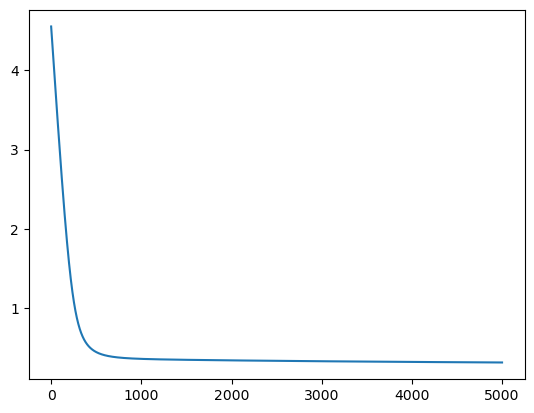

In [610]:
import matplotlib.pyplot as plt
plt.plot(model1.loss)

In [611]:
import pickle
with open('Hasan_Hussain_assignment1_part_1', 'wb') as files:
    pickle.dump(model1, files)

In [612]:
with open('Hasan_Hussain_assignment1_part_1' , 'rb') as f:
    lr1= pickle.load(f)

accuracy(test_y,lr1.predict(test_x))

0.87

# Model 2

In [574]:
train_x,train_y,test_x,test_y=train_test_split(df)

In [575]:
model2=LogisticRegression(learning_rate=.001, itr=2000)
model2.fit(train_x,train_y)
#model.predict(test_x)

For Iteration 0 the Loss is 4.4981.
For Iteration 1 the Loss is 4.4926.
For Iteration 2 the Loss is 4.4871.
For Iteration 3 the Loss is 4.4816.
For Iteration 4 the Loss is 4.476.
For Iteration 5 the Loss is 4.4705.
For Iteration 6 the Loss is 4.465.
For Iteration 7 the Loss is 4.4595.
For Iteration 8 the Loss is 4.454.
For Iteration 9 the Loss is 4.4485.
For Iteration 10 the Loss is 4.443.
For Iteration 11 the Loss is 4.4375.
For Iteration 12 the Loss is 4.4319.
For Iteration 13 the Loss is 4.4264.
For Iteration 14 the Loss is 4.4209.
For Iteration 15 the Loss is 4.4154.
For Iteration 16 the Loss is 4.4099.
For Iteration 17 the Loss is 4.4044.
For Iteration 18 the Loss is 4.3989.
For Iteration 19 the Loss is 4.3934.
For Iteration 20 the Loss is 4.3879.
For Iteration 21 the Loss is 4.3824.
For Iteration 22 the Loss is 4.3769.
For Iteration 23 the Loss is 4.3714.
For Iteration 24 the Loss is 4.3659.
For Iteration 25 the Loss is 4.3604.
For Iteration 26 the Loss is 4.3549.
For Iteration 2

For Iteration 221 the Loss is 3.2998.
For Iteration 222 the Loss is 3.2946.
For Iteration 223 the Loss is 3.2893.
For Iteration 224 the Loss is 3.284.
For Iteration 225 the Loss is 3.2787.
For Iteration 226 the Loss is 3.2735.
For Iteration 227 the Loss is 3.2682.
For Iteration 228 the Loss is 3.2629.
For Iteration 229 the Loss is 3.2576.
For Iteration 230 the Loss is 3.2524.
For Iteration 231 the Loss is 3.2471.
For Iteration 232 the Loss is 3.2418.
For Iteration 233 the Loss is 3.2366.
For Iteration 234 the Loss is 3.2313.
For Iteration 235 the Loss is 3.2261.
For Iteration 236 the Loss is 3.2208.
For Iteration 237 the Loss is 3.2156.
For Iteration 238 the Loss is 3.2103.
For Iteration 239 the Loss is 3.205.
For Iteration 240 the Loss is 3.1998.
For Iteration 241 the Loss is 3.1946.
For Iteration 242 the Loss is 3.1893.
For Iteration 243 the Loss is 3.1841.
For Iteration 244 the Loss is 3.1788.
For Iteration 245 the Loss is 3.1736.
For Iteration 246 the Loss is 3.1684.
For Iteration 

For Iteration 467 the Loss is 2.0836.
For Iteration 468 the Loss is 2.0792.
For Iteration 469 the Loss is 2.0747.
For Iteration 470 the Loss is 2.0703.
For Iteration 471 the Loss is 2.0658.
For Iteration 472 the Loss is 2.0614.
For Iteration 473 the Loss is 2.057.
For Iteration 474 the Loss is 2.0525.
For Iteration 475 the Loss is 2.0481.
For Iteration 476 the Loss is 2.0437.
For Iteration 477 the Loss is 2.0393.
For Iteration 478 the Loss is 2.0349.
For Iteration 479 the Loss is 2.0305.
For Iteration 480 the Loss is 2.0261.
For Iteration 481 the Loss is 2.0217.
For Iteration 482 the Loss is 2.0174.
For Iteration 483 the Loss is 2.013.
For Iteration 484 the Loss is 2.0086.
For Iteration 485 the Loss is 2.0043.
For Iteration 486 the Loss is 1.9999.
For Iteration 487 the Loss is 1.9956.
For Iteration 488 the Loss is 1.9912.
For Iteration 489 the Loss is 1.9869.
For Iteration 490 the Loss is 1.9826.
For Iteration 491 the Loss is 1.9782.
For Iteration 492 the Loss is 1.9739.
For Iteration 

For Iteration 725 the Loss is 1.1579.
For Iteration 726 the Loss is 1.1553.
For Iteration 727 the Loss is 1.1527.
For Iteration 728 the Loss is 1.1501.
For Iteration 729 the Loss is 1.1475.
For Iteration 730 the Loss is 1.1449.
For Iteration 731 the Loss is 1.1424.
For Iteration 732 the Loss is 1.1398.
For Iteration 733 the Loss is 1.1373.
For Iteration 734 the Loss is 1.1347.
For Iteration 735 the Loss is 1.1322.
For Iteration 736 the Loss is 1.1297.
For Iteration 737 the Loss is 1.1271.
For Iteration 738 the Loss is 1.1246.
For Iteration 739 the Loss is 1.1221.
For Iteration 740 the Loss is 1.1196.
For Iteration 741 the Loss is 1.1171.
For Iteration 742 the Loss is 1.1147.
For Iteration 743 the Loss is 1.1122.
For Iteration 744 the Loss is 1.1097.
For Iteration 745 the Loss is 1.1073.
For Iteration 746 the Loss is 1.1048.
For Iteration 747 the Loss is 1.1024.
For Iteration 748 the Loss is 1.0999.
For Iteration 749 the Loss is 1.0975.
For Iteration 750 the Loss is 1.0951.
For Iteratio

For Iteration 980 the Loss is 0.7092.
For Iteration 981 the Loss is 0.7081.
For Iteration 982 the Loss is 0.7071.
For Iteration 983 the Loss is 0.706.
For Iteration 984 the Loss is 0.7049.
For Iteration 985 the Loss is 0.7039.
For Iteration 986 the Loss is 0.7028.
For Iteration 987 the Loss is 0.7017.
For Iteration 988 the Loss is 0.7007.
For Iteration 989 the Loss is 0.6996.
For Iteration 990 the Loss is 0.6986.
For Iteration 991 the Loss is 0.6976.
For Iteration 992 the Loss is 0.6965.
For Iteration 993 the Loss is 0.6955.
For Iteration 994 the Loss is 0.6945.
For Iteration 995 the Loss is 0.6934.
For Iteration 996 the Loss is 0.6924.
For Iteration 997 the Loss is 0.6914.
For Iteration 998 the Loss is 0.6904.
For Iteration 999 the Loss is 0.6894.
For Iteration 1000 the Loss is 0.6884.
For Iteration 1001 the Loss is 0.6873.
For Iteration 1002 the Loss is 0.6863.
For Iteration 1003 the Loss is 0.6853.
For Iteration 1004 the Loss is 0.6844.
For Iteration 1005 the Loss is 0.6834.
For Ite

For Iteration 1260 the Loss is 0.5172.
For Iteration 1261 the Loss is 0.5168.
For Iteration 1262 the Loss is 0.5164.
For Iteration 1263 the Loss is 0.516.
For Iteration 1264 the Loss is 0.5156.
For Iteration 1265 the Loss is 0.5152.
For Iteration 1266 the Loss is 0.5147.
For Iteration 1267 the Loss is 0.5143.
For Iteration 1268 the Loss is 0.5139.
For Iteration 1269 the Loss is 0.5135.
For Iteration 1270 the Loss is 0.5131.
For Iteration 1271 the Loss is 0.5128.
For Iteration 1272 the Loss is 0.5124.
For Iteration 1273 the Loss is 0.512.
For Iteration 1274 the Loss is 0.5116.
For Iteration 1275 the Loss is 0.5112.
For Iteration 1276 the Loss is 0.5108.
For Iteration 1277 the Loss is 0.5104.
For Iteration 1278 the Loss is 0.51.
For Iteration 1279 the Loss is 0.5096.
For Iteration 1280 the Loss is 0.5092.
For Iteration 1281 the Loss is 0.5088.
For Iteration 1282 the Loss is 0.5085.
For Iteration 1283 the Loss is 0.5081.
For Iteration 1284 the Loss is 0.5077.
For Iteration 1285 the Loss i

For Iteration 1481 the Loss is 0.4513.
For Iteration 1482 the Loss is 0.4511.
For Iteration 1483 the Loss is 0.4509.
For Iteration 1484 the Loss is 0.4507.
For Iteration 1485 the Loss is 0.4504.
For Iteration 1486 the Loss is 0.4502.
For Iteration 1487 the Loss is 0.45.
For Iteration 1488 the Loss is 0.4498.
For Iteration 1489 the Loss is 0.4496.
For Iteration 1490 the Loss is 0.4494.
For Iteration 1491 the Loss is 0.4492.
For Iteration 1492 the Loss is 0.449.
For Iteration 1493 the Loss is 0.4488.
For Iteration 1494 the Loss is 0.4486.
For Iteration 1495 the Loss is 0.4484.
For Iteration 1496 the Loss is 0.4482.
For Iteration 1497 the Loss is 0.448.
For Iteration 1498 the Loss is 0.4478.
For Iteration 1499 the Loss is 0.4476.
For Iteration 1500 the Loss is 0.4474.
For Iteration 1501 the Loss is 0.4472.
For Iteration 1502 the Loss is 0.447.
For Iteration 1503 the Loss is 0.4468.
For Iteration 1504 the Loss is 0.4466.
For Iteration 1505 the Loss is 0.4464.
For Iteration 1506 the Loss is

For Iteration 1781 the Loss is 0.4072.
For Iteration 1782 the Loss is 0.4071.
For Iteration 1783 the Loss is 0.407.
For Iteration 1784 the Loss is 0.4069.
For Iteration 1785 the Loss is 0.4068.
For Iteration 1786 the Loss is 0.4067.
For Iteration 1787 the Loss is 0.4066.
For Iteration 1788 the Loss is 0.4065.
For Iteration 1789 the Loss is 0.4064.
For Iteration 1790 the Loss is 0.4063.
For Iteration 1791 the Loss is 0.4063.
For Iteration 1792 the Loss is 0.4062.
For Iteration 1793 the Loss is 0.4061.
For Iteration 1794 the Loss is 0.406.
For Iteration 1795 the Loss is 0.4059.
For Iteration 1796 the Loss is 0.4058.
For Iteration 1797 the Loss is 0.4057.
For Iteration 1798 the Loss is 0.4056.
For Iteration 1799 the Loss is 0.4055.
For Iteration 1800 the Loss is 0.4054.
For Iteration 1801 the Loss is 0.4053.
For Iteration 1802 the Loss is 0.4052.
For Iteration 1803 the Loss is 0.4051.
For Iteration 1804 the Loss is 0.405.
For Iteration 1805 the Loss is 0.4049.
For Iteration 1806 the Loss 

In [576]:
accuracy(test_y,model2.predict(test_x))

0.87

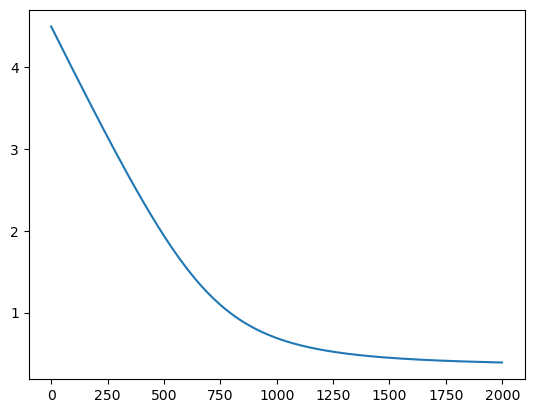

In [577]:
plt.plot(model2.loss)

In [578]:
import pickle
with open('pkl_file2', 'wb') as files:
    pickle.dump(model2, files)

In [579]:
with open('pkl_file2' , 'rb') as f:
    lr2 = pickle.load(f)

accuracy(test_y,lr2.predict(test_x))

0.87

# Model 3

In [580]:
train_x,train_y,test_x,test_y=train_test_split(df)

In [581]:
model3=LogisticRegression(learning_rate=.4,itr=10000)
model3.fit(train_x,train_y)
#model.predict(test_x)

For Iteration 0 the Loss is 4.5526.
For Iteration 1 the Loss is 2.3667.
For Iteration 2 the Loss is 0.7898.
For Iteration 3 the Loss is 0.4322.
For Iteration 4 the Loss is 0.3853.
For Iteration 5 the Loss is 0.3701.
For Iteration 6 the Loss is 0.363.
For Iteration 7 the Loss is 0.3587.
For Iteration 8 the Loss is 0.3556.
For Iteration 9 the Loss is 0.3531.
For Iteration 10 the Loss is 0.3509.
For Iteration 11 the Loss is 0.3489.
For Iteration 12 the Loss is 0.347.
For Iteration 13 the Loss is 0.3451.
For Iteration 14 the Loss is 0.3434.
For Iteration 15 the Loss is 0.3417.
For Iteration 16 the Loss is 0.3401.
For Iteration 17 the Loss is 0.3385.
For Iteration 18 the Loss is 0.337.
For Iteration 19 the Loss is 0.3355.
For Iteration 20 the Loss is 0.3341.
For Iteration 21 the Loss is 0.3327.
For Iteration 22 the Loss is 0.3314.
For Iteration 23 the Loss is 0.3301.
For Iteration 24 the Loss is 0.3288.
For Iteration 25 the Loss is 0.3276.
For Iteration 26 the Loss is 0.3264.
For Iteration 

For Iteration 288 the Loss is 0.2752.
For Iteration 289 the Loss is 0.2751.
For Iteration 290 the Loss is 0.2751.
For Iteration 291 the Loss is 0.2751.
For Iteration 292 the Loss is 0.275.
For Iteration 293 the Loss is 0.275.
For Iteration 294 the Loss is 0.275.
For Iteration 295 the Loss is 0.2749.
For Iteration 296 the Loss is 0.2749.
For Iteration 297 the Loss is 0.2749.
For Iteration 298 the Loss is 0.2748.
For Iteration 299 the Loss is 0.2748.
For Iteration 300 the Loss is 0.2748.
For Iteration 301 the Loss is 0.2748.
For Iteration 302 the Loss is 0.2747.
For Iteration 303 the Loss is 0.2747.
For Iteration 304 the Loss is 0.2747.
For Iteration 305 the Loss is 0.2746.
For Iteration 306 the Loss is 0.2746.
For Iteration 307 the Loss is 0.2746.
For Iteration 308 the Loss is 0.2746.
For Iteration 309 the Loss is 0.2745.
For Iteration 310 the Loss is 0.2745.
For Iteration 311 the Loss is 0.2745.
For Iteration 312 the Loss is 0.2744.
For Iteration 313 the Loss is 0.2744.
For Iteration 3

For Iteration 528 the Loss is 0.2706.
For Iteration 529 the Loss is 0.2706.
For Iteration 530 the Loss is 0.2706.
For Iteration 531 the Loss is 0.2706.
For Iteration 532 the Loss is 0.2706.
For Iteration 533 the Loss is 0.2706.
For Iteration 534 the Loss is 0.2706.
For Iteration 535 the Loss is 0.2706.
For Iteration 536 the Loss is 0.2705.
For Iteration 537 the Loss is 0.2705.
For Iteration 538 the Loss is 0.2705.
For Iteration 539 the Loss is 0.2705.
For Iteration 540 the Loss is 0.2705.
For Iteration 541 the Loss is 0.2705.
For Iteration 542 the Loss is 0.2705.
For Iteration 543 the Loss is 0.2705.
For Iteration 544 the Loss is 0.2705.
For Iteration 545 the Loss is 0.2704.
For Iteration 546 the Loss is 0.2704.
For Iteration 547 the Loss is 0.2704.
For Iteration 548 the Loss is 0.2704.
For Iteration 549 the Loss is 0.2704.
For Iteration 550 the Loss is 0.2704.
For Iteration 551 the Loss is 0.2704.
For Iteration 552 the Loss is 0.2704.
For Iteration 553 the Loss is 0.2704.
For Iteratio

For Iteration 747 the Loss is 0.2688.
For Iteration 748 the Loss is 0.2688.
For Iteration 749 the Loss is 0.2688.
For Iteration 750 the Loss is 0.2688.
For Iteration 751 the Loss is 0.2688.
For Iteration 752 the Loss is 0.2688.
For Iteration 753 the Loss is 0.2688.
For Iteration 754 the Loss is 0.2688.
For Iteration 755 the Loss is 0.2688.
For Iteration 756 the Loss is 0.2688.
For Iteration 757 the Loss is 0.2687.
For Iteration 758 the Loss is 0.2687.
For Iteration 759 the Loss is 0.2687.
For Iteration 760 the Loss is 0.2687.
For Iteration 761 the Loss is 0.2687.
For Iteration 762 the Loss is 0.2687.
For Iteration 763 the Loss is 0.2687.
For Iteration 764 the Loss is 0.2687.
For Iteration 765 the Loss is 0.2687.
For Iteration 766 the Loss is 0.2687.
For Iteration 767 the Loss is 0.2687.
For Iteration 768 the Loss is 0.2687.
For Iteration 769 the Loss is 0.2687.
For Iteration 770 the Loss is 0.2687.
For Iteration 771 the Loss is 0.2687.
For Iteration 772 the Loss is 0.2687.
For Iteratio

For Iteration 1020 the Loss is 0.2675.
For Iteration 1021 the Loss is 0.2675.
For Iteration 1022 the Loss is 0.2675.
For Iteration 1023 the Loss is 0.2674.
For Iteration 1024 the Loss is 0.2674.
For Iteration 1025 the Loss is 0.2674.
For Iteration 1026 the Loss is 0.2674.
For Iteration 1027 the Loss is 0.2674.
For Iteration 1028 the Loss is 0.2674.
For Iteration 1029 the Loss is 0.2674.
For Iteration 1030 the Loss is 0.2674.
For Iteration 1031 the Loss is 0.2674.
For Iteration 1032 the Loss is 0.2674.
For Iteration 1033 the Loss is 0.2674.
For Iteration 1034 the Loss is 0.2674.
For Iteration 1035 the Loss is 0.2674.
For Iteration 1036 the Loss is 0.2674.
For Iteration 1037 the Loss is 0.2674.
For Iteration 1038 the Loss is 0.2674.
For Iteration 1039 the Loss is 0.2674.
For Iteration 1040 the Loss is 0.2674.
For Iteration 1041 the Loss is 0.2674.
For Iteration 1042 the Loss is 0.2674.
For Iteration 1043 the Loss is 0.2674.
For Iteration 1044 the Loss is 0.2674.
For Iteration 1045 the Lo

For Iteration 1256 the Loss is 0.2666.
For Iteration 1257 the Loss is 0.2666.
For Iteration 1258 the Loss is 0.2666.
For Iteration 1259 the Loss is 0.2666.
For Iteration 1260 the Loss is 0.2666.
For Iteration 1261 the Loss is 0.2666.
For Iteration 1262 the Loss is 0.2666.
For Iteration 1263 the Loss is 0.2666.
For Iteration 1264 the Loss is 0.2666.
For Iteration 1265 the Loss is 0.2666.
For Iteration 1266 the Loss is 0.2666.
For Iteration 1267 the Loss is 0.2666.
For Iteration 1268 the Loss is 0.2666.
For Iteration 1269 the Loss is 0.2666.
For Iteration 1270 the Loss is 0.2666.
For Iteration 1271 the Loss is 0.2666.
For Iteration 1272 the Loss is 0.2666.
For Iteration 1273 the Loss is 0.2666.
For Iteration 1274 the Loss is 0.2666.
For Iteration 1275 the Loss is 0.2666.
For Iteration 1276 the Loss is 0.2666.
For Iteration 1277 the Loss is 0.2666.
For Iteration 1278 the Loss is 0.2666.
For Iteration 1279 the Loss is 0.2666.
For Iteration 1280 the Loss is 0.2666.
For Iteration 1281 the Lo

For Iteration 1554 the Loss is 0.2658.
For Iteration 1555 the Loss is 0.2658.
For Iteration 1556 the Loss is 0.2658.
For Iteration 1557 the Loss is 0.2658.
For Iteration 1558 the Loss is 0.2658.
For Iteration 1559 the Loss is 0.2658.
For Iteration 1560 the Loss is 0.2658.
For Iteration 1561 the Loss is 0.2658.
For Iteration 1562 the Loss is 0.2658.
For Iteration 1563 the Loss is 0.2658.
For Iteration 1564 the Loss is 0.2658.
For Iteration 1565 the Loss is 0.2658.
For Iteration 1566 the Loss is 0.2658.
For Iteration 1567 the Loss is 0.2658.
For Iteration 1568 the Loss is 0.2658.
For Iteration 1569 the Loss is 0.2658.
For Iteration 1570 the Loss is 0.2658.
For Iteration 1571 the Loss is 0.2658.
For Iteration 1572 the Loss is 0.2658.
For Iteration 1573 the Loss is 0.2658.
For Iteration 1574 the Loss is 0.2658.
For Iteration 1575 the Loss is 0.2658.
For Iteration 1576 the Loss is 0.2658.
For Iteration 1577 the Loss is 0.2658.
For Iteration 1578 the Loss is 0.2658.
For Iteration 1579 the Lo

For Iteration 1854 the Loss is 0.2652.
For Iteration 1855 the Loss is 0.2652.
For Iteration 1856 the Loss is 0.2652.
For Iteration 1857 the Loss is 0.2652.
For Iteration 1858 the Loss is 0.2652.
For Iteration 1859 the Loss is 0.2652.
For Iteration 1860 the Loss is 0.2652.
For Iteration 1861 the Loss is 0.2652.
For Iteration 1862 the Loss is 0.2652.
For Iteration 1863 the Loss is 0.2652.
For Iteration 1864 the Loss is 0.2652.
For Iteration 1865 the Loss is 0.2652.
For Iteration 1866 the Loss is 0.2652.
For Iteration 1867 the Loss is 0.2652.
For Iteration 1868 the Loss is 0.2651.
For Iteration 1869 the Loss is 0.2651.
For Iteration 1870 the Loss is 0.2651.
For Iteration 1871 the Loss is 0.2651.
For Iteration 1872 the Loss is 0.2651.
For Iteration 1873 the Loss is 0.2651.
For Iteration 1874 the Loss is 0.2651.
For Iteration 1875 the Loss is 0.2651.
For Iteration 1876 the Loss is 0.2651.
For Iteration 1877 the Loss is 0.2651.
For Iteration 1878 the Loss is 0.2651.
For Iteration 1879 the Lo

For Iteration 2168 the Loss is 0.2646.
For Iteration 2169 the Loss is 0.2646.
For Iteration 2170 the Loss is 0.2646.
For Iteration 2171 the Loss is 0.2646.
For Iteration 2172 the Loss is 0.2646.
For Iteration 2173 the Loss is 0.2646.
For Iteration 2174 the Loss is 0.2646.
For Iteration 2175 the Loss is 0.2646.
For Iteration 2176 the Loss is 0.2646.
For Iteration 2177 the Loss is 0.2646.
For Iteration 2178 the Loss is 0.2646.
For Iteration 2179 the Loss is 0.2646.
For Iteration 2180 the Loss is 0.2646.
For Iteration 2181 the Loss is 0.2646.
For Iteration 2182 the Loss is 0.2646.
For Iteration 2183 the Loss is 0.2646.
For Iteration 2184 the Loss is 0.2646.
For Iteration 2185 the Loss is 0.2646.
For Iteration 2186 the Loss is 0.2646.
For Iteration 2187 the Loss is 0.2646.
For Iteration 2188 the Loss is 0.2646.
For Iteration 2189 the Loss is 0.2646.
For Iteration 2190 the Loss is 0.2646.
For Iteration 2191 the Loss is 0.2646.
For Iteration 2192 the Loss is 0.2646.
For Iteration 2193 the Lo

For Iteration 2466 the Loss is 0.2641.
For Iteration 2467 the Loss is 0.2641.
For Iteration 2468 the Loss is 0.2641.
For Iteration 2469 the Loss is 0.2641.
For Iteration 2470 the Loss is 0.2641.
For Iteration 2471 the Loss is 0.2641.
For Iteration 2472 the Loss is 0.2641.
For Iteration 2473 the Loss is 0.2641.
For Iteration 2474 the Loss is 0.2641.
For Iteration 2475 the Loss is 0.2641.
For Iteration 2476 the Loss is 0.2641.
For Iteration 2477 the Loss is 0.2641.
For Iteration 2478 the Loss is 0.2641.
For Iteration 2479 the Loss is 0.2641.
For Iteration 2480 the Loss is 0.2641.
For Iteration 2481 the Loss is 0.2641.
For Iteration 2482 the Loss is 0.2641.
For Iteration 2483 the Loss is 0.2641.
For Iteration 2484 the Loss is 0.2641.
For Iteration 2485 the Loss is 0.2641.
For Iteration 2486 the Loss is 0.2641.
For Iteration 2487 the Loss is 0.2641.
For Iteration 2488 the Loss is 0.2641.
For Iteration 2489 the Loss is 0.2641.
For Iteration 2490 the Loss is 0.2641.
For Iteration 2491 the Lo

For Iteration 2750 the Loss is 0.2637.
For Iteration 2751 the Loss is 0.2637.
For Iteration 2752 the Loss is 0.2637.
For Iteration 2753 the Loss is 0.2637.
For Iteration 2754 the Loss is 0.2637.
For Iteration 2755 the Loss is 0.2637.
For Iteration 2756 the Loss is 0.2637.
For Iteration 2757 the Loss is 0.2637.
For Iteration 2758 the Loss is 0.2637.
For Iteration 2759 the Loss is 0.2637.
For Iteration 2760 the Loss is 0.2637.
For Iteration 2761 the Loss is 0.2637.
For Iteration 2762 the Loss is 0.2637.
For Iteration 2763 the Loss is 0.2637.
For Iteration 2764 the Loss is 0.2637.
For Iteration 2765 the Loss is 0.2637.
For Iteration 2766 the Loss is 0.2637.
For Iteration 2767 the Loss is 0.2637.
For Iteration 2768 the Loss is 0.2637.
For Iteration 2769 the Loss is 0.2637.
For Iteration 2770 the Loss is 0.2637.
For Iteration 2771 the Loss is 0.2637.
For Iteration 2772 the Loss is 0.2637.
For Iteration 2773 the Loss is 0.2637.
For Iteration 2774 the Loss is 0.2637.
For Iteration 2775 the Lo

For Iteration 3033 the Loss is 0.2634.
For Iteration 3034 the Loss is 0.2634.
For Iteration 3035 the Loss is 0.2634.
For Iteration 3036 the Loss is 0.2634.
For Iteration 3037 the Loss is 0.2634.
For Iteration 3038 the Loss is 0.2634.
For Iteration 3039 the Loss is 0.2634.
For Iteration 3040 the Loss is 0.2634.
For Iteration 3041 the Loss is 0.2634.
For Iteration 3042 the Loss is 0.2634.
For Iteration 3043 the Loss is 0.2634.
For Iteration 3044 the Loss is 0.2634.
For Iteration 3045 the Loss is 0.2634.
For Iteration 3046 the Loss is 0.2634.
For Iteration 3047 the Loss is 0.2634.
For Iteration 3048 the Loss is 0.2634.
For Iteration 3049 the Loss is 0.2634.
For Iteration 3050 the Loss is 0.2634.
For Iteration 3051 the Loss is 0.2634.
For Iteration 3052 the Loss is 0.2634.
For Iteration 3053 the Loss is 0.2634.
For Iteration 3054 the Loss is 0.2634.
For Iteration 3055 the Loss is 0.2634.
For Iteration 3056 the Loss is 0.2634.
For Iteration 3057 the Loss is 0.2634.
For Iteration 3058 the Lo

For Iteration 3319 the Loss is 0.2631.
For Iteration 3320 the Loss is 0.2631.
For Iteration 3321 the Loss is 0.2631.
For Iteration 3322 the Loss is 0.2631.
For Iteration 3323 the Loss is 0.2631.
For Iteration 3324 the Loss is 0.2631.
For Iteration 3325 the Loss is 0.2631.
For Iteration 3326 the Loss is 0.2631.
For Iteration 3327 the Loss is 0.2631.
For Iteration 3328 the Loss is 0.2631.
For Iteration 3329 the Loss is 0.2631.
For Iteration 3330 the Loss is 0.2631.
For Iteration 3331 the Loss is 0.2631.
For Iteration 3332 the Loss is 0.2631.
For Iteration 3333 the Loss is 0.2631.
For Iteration 3334 the Loss is 0.2631.
For Iteration 3335 the Loss is 0.2631.
For Iteration 3336 the Loss is 0.2631.
For Iteration 3337 the Loss is 0.2631.
For Iteration 3338 the Loss is 0.2631.
For Iteration 3339 the Loss is 0.2631.
For Iteration 3340 the Loss is 0.2631.
For Iteration 3341 the Loss is 0.263.
For Iteration 3342 the Loss is 0.263.
For Iteration 3343 the Loss is 0.263.
For Iteration 3344 the Loss 

For Iteration 3601 the Loss is 0.2628.
For Iteration 3602 the Loss is 0.2628.
For Iteration 3603 the Loss is 0.2628.
For Iteration 3604 the Loss is 0.2628.
For Iteration 3605 the Loss is 0.2628.
For Iteration 3606 the Loss is 0.2628.
For Iteration 3607 the Loss is 0.2628.
For Iteration 3608 the Loss is 0.2628.
For Iteration 3609 the Loss is 0.2628.
For Iteration 3610 the Loss is 0.2628.
For Iteration 3611 the Loss is 0.2628.
For Iteration 3612 the Loss is 0.2628.
For Iteration 3613 the Loss is 0.2628.
For Iteration 3614 the Loss is 0.2628.
For Iteration 3615 the Loss is 0.2628.
For Iteration 3616 the Loss is 0.2628.
For Iteration 3617 the Loss is 0.2628.
For Iteration 3618 the Loss is 0.2628.
For Iteration 3619 the Loss is 0.2628.
For Iteration 3620 the Loss is 0.2628.
For Iteration 3621 the Loss is 0.2628.
For Iteration 3622 the Loss is 0.2628.
For Iteration 3623 the Loss is 0.2628.
For Iteration 3624 the Loss is 0.2628.
For Iteration 3625 the Loss is 0.2628.
For Iteration 3626 the Lo

For Iteration 3878 the Loss is 0.2626.
For Iteration 3879 the Loss is 0.2626.
For Iteration 3880 the Loss is 0.2626.
For Iteration 3881 the Loss is 0.2626.
For Iteration 3882 the Loss is 0.2626.
For Iteration 3883 the Loss is 0.2626.
For Iteration 3884 the Loss is 0.2625.
For Iteration 3885 the Loss is 0.2625.
For Iteration 3886 the Loss is 0.2625.
For Iteration 3887 the Loss is 0.2625.
For Iteration 3888 the Loss is 0.2625.
For Iteration 3889 the Loss is 0.2625.
For Iteration 3890 the Loss is 0.2625.
For Iteration 3891 the Loss is 0.2625.
For Iteration 3892 the Loss is 0.2625.
For Iteration 3893 the Loss is 0.2625.
For Iteration 3894 the Loss is 0.2625.
For Iteration 3895 the Loss is 0.2625.
For Iteration 3896 the Loss is 0.2625.
For Iteration 3897 the Loss is 0.2625.
For Iteration 3898 the Loss is 0.2625.
For Iteration 3899 the Loss is 0.2625.
For Iteration 3900 the Loss is 0.2625.
For Iteration 3901 the Loss is 0.2625.
For Iteration 3902 the Loss is 0.2625.
For Iteration 3903 the Lo

For Iteration 4154 the Loss is 0.2623.
For Iteration 4155 the Loss is 0.2623.
For Iteration 4156 the Loss is 0.2623.
For Iteration 4157 the Loss is 0.2623.
For Iteration 4158 the Loss is 0.2623.
For Iteration 4159 the Loss is 0.2623.
For Iteration 4160 the Loss is 0.2623.
For Iteration 4161 the Loss is 0.2623.
For Iteration 4162 the Loss is 0.2623.
For Iteration 4163 the Loss is 0.2623.
For Iteration 4164 the Loss is 0.2623.
For Iteration 4165 the Loss is 0.2623.
For Iteration 4166 the Loss is 0.2623.
For Iteration 4167 the Loss is 0.2623.
For Iteration 4168 the Loss is 0.2623.
For Iteration 4169 the Loss is 0.2623.
For Iteration 4170 the Loss is 0.2623.
For Iteration 4171 the Loss is 0.2623.
For Iteration 4172 the Loss is 0.2623.
For Iteration 4173 the Loss is 0.2623.
For Iteration 4174 the Loss is 0.2623.
For Iteration 4175 the Loss is 0.2623.
For Iteration 4176 the Loss is 0.2623.
For Iteration 4177 the Loss is 0.2623.
For Iteration 4178 the Loss is 0.2623.
For Iteration 4179 the Lo

For Iteration 4422 the Loss is 0.2621.
For Iteration 4423 the Loss is 0.2621.
For Iteration 4424 the Loss is 0.2621.
For Iteration 4425 the Loss is 0.2621.
For Iteration 4426 the Loss is 0.2621.
For Iteration 4427 the Loss is 0.2621.
For Iteration 4428 the Loss is 0.2621.
For Iteration 4429 the Loss is 0.2621.
For Iteration 4430 the Loss is 0.2621.
For Iteration 4431 the Loss is 0.2621.
For Iteration 4432 the Loss is 0.2621.
For Iteration 4433 the Loss is 0.2621.
For Iteration 4434 the Loss is 0.2621.
For Iteration 4435 the Loss is 0.2621.
For Iteration 4436 the Loss is 0.2621.
For Iteration 4437 the Loss is 0.2621.
For Iteration 4438 the Loss is 0.2621.
For Iteration 4439 the Loss is 0.2621.
For Iteration 4440 the Loss is 0.2621.
For Iteration 4441 the Loss is 0.2621.
For Iteration 4442 the Loss is 0.2621.
For Iteration 4443 the Loss is 0.2621.
For Iteration 4444 the Loss is 0.2621.
For Iteration 4445 the Loss is 0.2621.
For Iteration 4446 the Loss is 0.2621.
For Iteration 4447 the Lo

For Iteration 4644 the Loss is 0.262.
For Iteration 4645 the Loss is 0.262.
For Iteration 4646 the Loss is 0.262.
For Iteration 4647 the Loss is 0.262.
For Iteration 4648 the Loss is 0.262.
For Iteration 4649 the Loss is 0.262.
For Iteration 4650 the Loss is 0.262.
For Iteration 4651 the Loss is 0.262.
For Iteration 4652 the Loss is 0.262.
For Iteration 4653 the Loss is 0.262.
For Iteration 4654 the Loss is 0.262.
For Iteration 4655 the Loss is 0.262.
For Iteration 4656 the Loss is 0.262.
For Iteration 4657 the Loss is 0.262.
For Iteration 4658 the Loss is 0.262.
For Iteration 4659 the Loss is 0.262.
For Iteration 4660 the Loss is 0.262.
For Iteration 4661 the Loss is 0.262.
For Iteration 4662 the Loss is 0.262.
For Iteration 4663 the Loss is 0.262.
For Iteration 4664 the Loss is 0.262.
For Iteration 4665 the Loss is 0.262.
For Iteration 4666 the Loss is 0.262.
For Iteration 4667 the Loss is 0.262.
For Iteration 4668 the Loss is 0.262.
For Iteration 4669 the Loss is 0.262.
For Iteratio

For Iteration 4904 the Loss is 0.2618.
For Iteration 4905 the Loss is 0.2618.
For Iteration 4906 the Loss is 0.2618.
For Iteration 4907 the Loss is 0.2618.
For Iteration 4908 the Loss is 0.2618.
For Iteration 4909 the Loss is 0.2618.
For Iteration 4910 the Loss is 0.2618.
For Iteration 4911 the Loss is 0.2618.
For Iteration 4912 the Loss is 0.2618.
For Iteration 4913 the Loss is 0.2618.
For Iteration 4914 the Loss is 0.2618.
For Iteration 4915 the Loss is 0.2618.
For Iteration 4916 the Loss is 0.2618.
For Iteration 4917 the Loss is 0.2618.
For Iteration 4918 the Loss is 0.2618.
For Iteration 4919 the Loss is 0.2618.
For Iteration 4920 the Loss is 0.2618.
For Iteration 4921 the Loss is 0.2618.
For Iteration 4922 the Loss is 0.2618.
For Iteration 4923 the Loss is 0.2618.
For Iteration 4924 the Loss is 0.2618.
For Iteration 4925 the Loss is 0.2618.
For Iteration 4926 the Loss is 0.2618.
For Iteration 4927 the Loss is 0.2618.
For Iteration 4928 the Loss is 0.2618.
For Iteration 4929 the Lo

For Iteration 5121 the Loss is 0.2617.
For Iteration 5122 the Loss is 0.2617.
For Iteration 5123 the Loss is 0.2617.
For Iteration 5124 the Loss is 0.2617.
For Iteration 5125 the Loss is 0.2617.
For Iteration 5126 the Loss is 0.2617.
For Iteration 5127 the Loss is 0.2617.
For Iteration 5128 the Loss is 0.2617.
For Iteration 5129 the Loss is 0.2617.
For Iteration 5130 the Loss is 0.2617.
For Iteration 5131 the Loss is 0.2617.
For Iteration 5132 the Loss is 0.2617.
For Iteration 5133 the Loss is 0.2617.
For Iteration 5134 the Loss is 0.2617.
For Iteration 5135 the Loss is 0.2617.
For Iteration 5136 the Loss is 0.2617.
For Iteration 5137 the Loss is 0.2617.
For Iteration 5138 the Loss is 0.2617.
For Iteration 5139 the Loss is 0.2617.
For Iteration 5140 the Loss is 0.2617.
For Iteration 5141 the Loss is 0.2617.
For Iteration 5142 the Loss is 0.2617.
For Iteration 5143 the Loss is 0.2617.
For Iteration 5144 the Loss is 0.2617.
For Iteration 5145 the Loss is 0.2617.
For Iteration 5146 the Lo

For Iteration 5403 the Loss is 0.2616.
For Iteration 5404 the Loss is 0.2616.
For Iteration 5405 the Loss is 0.2616.
For Iteration 5406 the Loss is 0.2616.
For Iteration 5407 the Loss is 0.2616.
For Iteration 5408 the Loss is 0.2616.
For Iteration 5409 the Loss is 0.2616.
For Iteration 5410 the Loss is 0.2616.
For Iteration 5411 the Loss is 0.2616.
For Iteration 5412 the Loss is 0.2616.
For Iteration 5413 the Loss is 0.2616.
For Iteration 5414 the Loss is 0.2616.
For Iteration 5415 the Loss is 0.2616.
For Iteration 5416 the Loss is 0.2616.
For Iteration 5417 the Loss is 0.2616.
For Iteration 5418 the Loss is 0.2616.
For Iteration 5419 the Loss is 0.2616.
For Iteration 5420 the Loss is 0.2616.
For Iteration 5421 the Loss is 0.2616.
For Iteration 5422 the Loss is 0.2616.
For Iteration 5423 the Loss is 0.2616.
For Iteration 5424 the Loss is 0.2616.
For Iteration 5425 the Loss is 0.2616.
For Iteration 5426 the Loss is 0.2616.
For Iteration 5427 the Loss is 0.2616.
For Iteration 5428 the Lo

For Iteration 5634 the Loss is 0.2615.
For Iteration 5635 the Loss is 0.2615.
For Iteration 5636 the Loss is 0.2615.
For Iteration 5637 the Loss is 0.2615.
For Iteration 5638 the Loss is 0.2615.
For Iteration 5639 the Loss is 0.2615.
For Iteration 5640 the Loss is 0.2615.
For Iteration 5641 the Loss is 0.2615.
For Iteration 5642 the Loss is 0.2615.
For Iteration 5643 the Loss is 0.2615.
For Iteration 5644 the Loss is 0.2615.
For Iteration 5645 the Loss is 0.2615.
For Iteration 5646 the Loss is 0.2615.
For Iteration 5647 the Loss is 0.2615.
For Iteration 5648 the Loss is 0.2615.
For Iteration 5649 the Loss is 0.2615.
For Iteration 5650 the Loss is 0.2615.
For Iteration 5651 the Loss is 0.2615.
For Iteration 5652 the Loss is 0.2615.
For Iteration 5653 the Loss is 0.2615.
For Iteration 5654 the Loss is 0.2615.
For Iteration 5655 the Loss is 0.2615.
For Iteration 5656 the Loss is 0.2615.
For Iteration 5657 the Loss is 0.2615.
For Iteration 5658 the Loss is 0.2615.
For Iteration 5659 the Lo

For Iteration 5885 the Loss is 0.2614.
For Iteration 5886 the Loss is 0.2614.
For Iteration 5887 the Loss is 0.2614.
For Iteration 5888 the Loss is 0.2614.
For Iteration 5889 the Loss is 0.2614.
For Iteration 5890 the Loss is 0.2614.
For Iteration 5891 the Loss is 0.2614.
For Iteration 5892 the Loss is 0.2614.
For Iteration 5893 the Loss is 0.2614.
For Iteration 5894 the Loss is 0.2614.
For Iteration 5895 the Loss is 0.2614.
For Iteration 5896 the Loss is 0.2614.
For Iteration 5897 the Loss is 0.2614.
For Iteration 5898 the Loss is 0.2614.
For Iteration 5899 the Loss is 0.2614.
For Iteration 5900 the Loss is 0.2614.
For Iteration 5901 the Loss is 0.2614.
For Iteration 5902 the Loss is 0.2614.
For Iteration 5903 the Loss is 0.2614.
For Iteration 5904 the Loss is 0.2614.
For Iteration 5905 the Loss is 0.2614.
For Iteration 5906 the Loss is 0.2614.
For Iteration 5907 the Loss is 0.2614.
For Iteration 5908 the Loss is 0.2614.
For Iteration 5909 the Loss is 0.2614.
For Iteration 5910 the Lo

For Iteration 6156 the Loss is 0.2613.
For Iteration 6157 the Loss is 0.2613.
For Iteration 6158 the Loss is 0.2613.
For Iteration 6159 the Loss is 0.2613.
For Iteration 6160 the Loss is 0.2613.
For Iteration 6161 the Loss is 0.2613.
For Iteration 6162 the Loss is 0.2613.
For Iteration 6163 the Loss is 0.2613.
For Iteration 6164 the Loss is 0.2613.
For Iteration 6165 the Loss is 0.2613.
For Iteration 6166 the Loss is 0.2613.
For Iteration 6167 the Loss is 0.2613.
For Iteration 6168 the Loss is 0.2613.
For Iteration 6169 the Loss is 0.2613.
For Iteration 6170 the Loss is 0.2613.
For Iteration 6171 the Loss is 0.2613.
For Iteration 6172 the Loss is 0.2613.
For Iteration 6173 the Loss is 0.2613.
For Iteration 6174 the Loss is 0.2613.
For Iteration 6175 the Loss is 0.2613.
For Iteration 6176 the Loss is 0.2613.
For Iteration 6177 the Loss is 0.2613.
For Iteration 6178 the Loss is 0.2613.
For Iteration 6179 the Loss is 0.2613.
For Iteration 6180 the Loss is 0.2613.
For Iteration 6181 the Lo

For Iteration 6441 the Loss is 0.2612.
For Iteration 6442 the Loss is 0.2612.
For Iteration 6443 the Loss is 0.2612.
For Iteration 6444 the Loss is 0.2612.
For Iteration 6445 the Loss is 0.2612.
For Iteration 6446 the Loss is 0.2612.
For Iteration 6447 the Loss is 0.2612.
For Iteration 6448 the Loss is 0.2612.
For Iteration 6449 the Loss is 0.2612.
For Iteration 6450 the Loss is 0.2612.
For Iteration 6451 the Loss is 0.2612.
For Iteration 6452 the Loss is 0.2612.
For Iteration 6453 the Loss is 0.2612.
For Iteration 6454 the Loss is 0.2612.
For Iteration 6455 the Loss is 0.2612.
For Iteration 6456 the Loss is 0.2612.
For Iteration 6457 the Loss is 0.2612.
For Iteration 6458 the Loss is 0.2612.
For Iteration 6459 the Loss is 0.2612.
For Iteration 6460 the Loss is 0.2612.
For Iteration 6461 the Loss is 0.2612.
For Iteration 6462 the Loss is 0.2612.
For Iteration 6463 the Loss is 0.2612.
For Iteration 6464 the Loss is 0.2612.
For Iteration 6465 the Loss is 0.2612.
For Iteration 6466 the Lo

For Iteration 6707 the Loss is 0.2611.
For Iteration 6708 the Loss is 0.2611.
For Iteration 6709 the Loss is 0.2611.
For Iteration 6710 the Loss is 0.2611.
For Iteration 6711 the Loss is 0.2611.
For Iteration 6712 the Loss is 0.2611.
For Iteration 6713 the Loss is 0.2611.
For Iteration 6714 the Loss is 0.2611.
For Iteration 6715 the Loss is 0.2611.
For Iteration 6716 the Loss is 0.2611.
For Iteration 6717 the Loss is 0.2611.
For Iteration 6718 the Loss is 0.2611.
For Iteration 6719 the Loss is 0.2611.
For Iteration 6720 the Loss is 0.2611.
For Iteration 6721 the Loss is 0.2611.
For Iteration 6722 the Loss is 0.2611.
For Iteration 6723 the Loss is 0.2611.
For Iteration 6724 the Loss is 0.2611.
For Iteration 6725 the Loss is 0.2611.
For Iteration 6726 the Loss is 0.2611.
For Iteration 6727 the Loss is 0.2611.
For Iteration 6728 the Loss is 0.2611.
For Iteration 6729 the Loss is 0.2611.
For Iteration 6730 the Loss is 0.2611.
For Iteration 6731 the Loss is 0.2611.
For Iteration 6732 the Lo

For Iteration 6973 the Loss is 0.261.
For Iteration 6974 the Loss is 0.261.
For Iteration 6975 the Loss is 0.261.
For Iteration 6976 the Loss is 0.261.
For Iteration 6977 the Loss is 0.261.
For Iteration 6978 the Loss is 0.261.
For Iteration 6979 the Loss is 0.261.
For Iteration 6980 the Loss is 0.261.
For Iteration 6981 the Loss is 0.261.
For Iteration 6982 the Loss is 0.261.
For Iteration 6983 the Loss is 0.261.
For Iteration 6984 the Loss is 0.261.
For Iteration 6985 the Loss is 0.261.
For Iteration 6986 the Loss is 0.261.
For Iteration 6987 the Loss is 0.261.
For Iteration 6988 the Loss is 0.261.
For Iteration 6989 the Loss is 0.261.
For Iteration 6990 the Loss is 0.261.
For Iteration 6991 the Loss is 0.261.
For Iteration 6992 the Loss is 0.261.
For Iteration 6993 the Loss is 0.261.
For Iteration 6994 the Loss is 0.261.
For Iteration 6995 the Loss is 0.261.
For Iteration 6996 the Loss is 0.261.
For Iteration 6997 the Loss is 0.261.
For Iteration 6998 the Loss is 0.261.
For Iteratio

For Iteration 7215 the Loss is 0.2609.
For Iteration 7216 the Loss is 0.2609.
For Iteration 7217 the Loss is 0.2609.
For Iteration 7218 the Loss is 0.2609.
For Iteration 7219 the Loss is 0.2609.
For Iteration 7220 the Loss is 0.2609.
For Iteration 7221 the Loss is 0.2609.
For Iteration 7222 the Loss is 0.2609.
For Iteration 7223 the Loss is 0.2609.
For Iteration 7224 the Loss is 0.2609.
For Iteration 7225 the Loss is 0.2609.
For Iteration 7226 the Loss is 0.2609.
For Iteration 7227 the Loss is 0.2609.
For Iteration 7228 the Loss is 0.2609.
For Iteration 7229 the Loss is 0.2609.
For Iteration 7230 the Loss is 0.2609.
For Iteration 7231 the Loss is 0.2609.
For Iteration 7232 the Loss is 0.2609.
For Iteration 7233 the Loss is 0.2609.
For Iteration 7234 the Loss is 0.2609.
For Iteration 7235 the Loss is 0.2609.
For Iteration 7236 the Loss is 0.2609.
For Iteration 7237 the Loss is 0.2609.
For Iteration 7238 the Loss is 0.2609.
For Iteration 7239 the Loss is 0.2609.
For Iteration 7240 the Lo

For Iteration 7471 the Loss is 0.2609.
For Iteration 7472 the Loss is 0.2609.
For Iteration 7473 the Loss is 0.2609.
For Iteration 7474 the Loss is 0.2609.
For Iteration 7475 the Loss is 0.2609.
For Iteration 7476 the Loss is 0.2609.
For Iteration 7477 the Loss is 0.2609.
For Iteration 7478 the Loss is 0.2609.
For Iteration 7479 the Loss is 0.2609.
For Iteration 7480 the Loss is 0.2609.
For Iteration 7481 the Loss is 0.2609.
For Iteration 7482 the Loss is 0.2609.
For Iteration 7483 the Loss is 0.2609.
For Iteration 7484 the Loss is 0.2609.
For Iteration 7485 the Loss is 0.2609.
For Iteration 7486 the Loss is 0.2609.
For Iteration 7487 the Loss is 0.2609.
For Iteration 7488 the Loss is 0.2609.
For Iteration 7489 the Loss is 0.2609.
For Iteration 7490 the Loss is 0.2609.
For Iteration 7491 the Loss is 0.2609.
For Iteration 7492 the Loss is 0.2609.
For Iteration 7493 the Loss is 0.2609.
For Iteration 7494 the Loss is 0.2609.
For Iteration 7495 the Loss is 0.2609.
For Iteration 7496 the Lo

For Iteration 7742 the Loss is 0.2608.
For Iteration 7743 the Loss is 0.2608.
For Iteration 7744 the Loss is 0.2608.
For Iteration 7745 the Loss is 0.2608.
For Iteration 7746 the Loss is 0.2608.
For Iteration 7747 the Loss is 0.2608.
For Iteration 7748 the Loss is 0.2608.
For Iteration 7749 the Loss is 0.2608.
For Iteration 7750 the Loss is 0.2608.
For Iteration 7751 the Loss is 0.2608.
For Iteration 7752 the Loss is 0.2608.
For Iteration 7753 the Loss is 0.2608.
For Iteration 7754 the Loss is 0.2608.
For Iteration 7755 the Loss is 0.2608.
For Iteration 7756 the Loss is 0.2608.
For Iteration 7757 the Loss is 0.2608.
For Iteration 7758 the Loss is 0.2608.
For Iteration 7759 the Loss is 0.2608.
For Iteration 7760 the Loss is 0.2608.
For Iteration 7761 the Loss is 0.2608.
For Iteration 7762 the Loss is 0.2608.
For Iteration 7763 the Loss is 0.2608.
For Iteration 7764 the Loss is 0.2608.
For Iteration 7765 the Loss is 0.2608.
For Iteration 7766 the Loss is 0.2608.
For Iteration 7767 the Lo

For Iteration 8030 the Loss is 0.2607.
For Iteration 8031 the Loss is 0.2607.
For Iteration 8032 the Loss is 0.2607.
For Iteration 8033 the Loss is 0.2607.
For Iteration 8034 the Loss is 0.2607.
For Iteration 8035 the Loss is 0.2607.
For Iteration 8036 the Loss is 0.2607.
For Iteration 8037 the Loss is 0.2607.
For Iteration 8038 the Loss is 0.2607.
For Iteration 8039 the Loss is 0.2607.
For Iteration 8040 the Loss is 0.2607.
For Iteration 8041 the Loss is 0.2607.
For Iteration 8042 the Loss is 0.2607.
For Iteration 8043 the Loss is 0.2607.
For Iteration 8044 the Loss is 0.2607.
For Iteration 8045 the Loss is 0.2607.
For Iteration 8046 the Loss is 0.2607.
For Iteration 8047 the Loss is 0.2607.
For Iteration 8048 the Loss is 0.2607.
For Iteration 8049 the Loss is 0.2607.
For Iteration 8050 the Loss is 0.2607.
For Iteration 8051 the Loss is 0.2607.
For Iteration 8052 the Loss is 0.2607.
For Iteration 8053 the Loss is 0.2607.
For Iteration 8054 the Loss is 0.2607.
For Iteration 8055 the Lo

For Iteration 8307 the Loss is 0.2607.
For Iteration 8308 the Loss is 0.2607.
For Iteration 8309 the Loss is 0.2607.
For Iteration 8310 the Loss is 0.2607.
For Iteration 8311 the Loss is 0.2607.
For Iteration 8312 the Loss is 0.2607.
For Iteration 8313 the Loss is 0.2607.
For Iteration 8314 the Loss is 0.2607.
For Iteration 8315 the Loss is 0.2607.
For Iteration 8316 the Loss is 0.2607.
For Iteration 8317 the Loss is 0.2607.
For Iteration 8318 the Loss is 0.2607.
For Iteration 8319 the Loss is 0.2607.
For Iteration 8320 the Loss is 0.2607.
For Iteration 8321 the Loss is 0.2607.
For Iteration 8322 the Loss is 0.2607.
For Iteration 8323 the Loss is 0.2607.
For Iteration 8324 the Loss is 0.2607.
For Iteration 8325 the Loss is 0.2607.
For Iteration 8326 the Loss is 0.2607.
For Iteration 8327 the Loss is 0.2607.
For Iteration 8328 the Loss is 0.2607.
For Iteration 8329 the Loss is 0.2607.
For Iteration 8330 the Loss is 0.2607.
For Iteration 8331 the Loss is 0.2607.
For Iteration 8332 the Lo

For Iteration 8584 the Loss is 0.2606.
For Iteration 8585 the Loss is 0.2606.
For Iteration 8586 the Loss is 0.2606.
For Iteration 8587 the Loss is 0.2606.
For Iteration 8588 the Loss is 0.2606.
For Iteration 8589 the Loss is 0.2606.
For Iteration 8590 the Loss is 0.2606.
For Iteration 8591 the Loss is 0.2606.
For Iteration 8592 the Loss is 0.2606.
For Iteration 8593 the Loss is 0.2606.
For Iteration 8594 the Loss is 0.2606.
For Iteration 8595 the Loss is 0.2606.
For Iteration 8596 the Loss is 0.2606.
For Iteration 8597 the Loss is 0.2606.
For Iteration 8598 the Loss is 0.2606.
For Iteration 8599 the Loss is 0.2606.
For Iteration 8600 the Loss is 0.2606.
For Iteration 8601 the Loss is 0.2606.
For Iteration 8602 the Loss is 0.2606.
For Iteration 8603 the Loss is 0.2606.
For Iteration 8604 the Loss is 0.2606.
For Iteration 8605 the Loss is 0.2606.
For Iteration 8606 the Loss is 0.2606.
For Iteration 8607 the Loss is 0.2606.
For Iteration 8608 the Loss is 0.2606.
For Iteration 8609 the Lo

For Iteration 8850 the Loss is 0.2606.
For Iteration 8851 the Loss is 0.2606.
For Iteration 8852 the Loss is 0.2606.
For Iteration 8853 the Loss is 0.2606.
For Iteration 8854 the Loss is 0.2606.
For Iteration 8855 the Loss is 0.2606.
For Iteration 8856 the Loss is 0.2606.
For Iteration 8857 the Loss is 0.2606.
For Iteration 8858 the Loss is 0.2606.
For Iteration 8859 the Loss is 0.2606.
For Iteration 8860 the Loss is 0.2606.
For Iteration 8861 the Loss is 0.2606.
For Iteration 8862 the Loss is 0.2606.
For Iteration 8863 the Loss is 0.2606.
For Iteration 8864 the Loss is 0.2606.
For Iteration 8865 the Loss is 0.2606.
For Iteration 8866 the Loss is 0.2606.
For Iteration 8867 the Loss is 0.2606.
For Iteration 8868 the Loss is 0.2606.
For Iteration 8869 the Loss is 0.2606.
For Iteration 8870 the Loss is 0.2606.
For Iteration 8871 the Loss is 0.2606.
For Iteration 8872 the Loss is 0.2606.
For Iteration 8873 the Loss is 0.2606.
For Iteration 8874 the Loss is 0.2606.
For Iteration 8875 the Lo

For Iteration 9077 the Loss is 0.2606.
For Iteration 9078 the Loss is 0.2606.
For Iteration 9079 the Loss is 0.2606.
For Iteration 9080 the Loss is 0.2606.
For Iteration 9081 the Loss is 0.2606.
For Iteration 9082 the Loss is 0.2606.
For Iteration 9083 the Loss is 0.2606.
For Iteration 9084 the Loss is 0.2606.
For Iteration 9085 the Loss is 0.2606.
For Iteration 9086 the Loss is 0.2606.
For Iteration 9087 the Loss is 0.2606.
For Iteration 9088 the Loss is 0.2606.
For Iteration 9089 the Loss is 0.2606.
For Iteration 9090 the Loss is 0.2606.
For Iteration 9091 the Loss is 0.2606.
For Iteration 9092 the Loss is 0.2606.
For Iteration 9093 the Loss is 0.2606.
For Iteration 9094 the Loss is 0.2606.
For Iteration 9095 the Loss is 0.2606.
For Iteration 9096 the Loss is 0.2606.
For Iteration 9097 the Loss is 0.2606.
For Iteration 9098 the Loss is 0.2606.
For Iteration 9099 the Loss is 0.2606.
For Iteration 9100 the Loss is 0.2606.
For Iteration 9101 the Loss is 0.2606.
For Iteration 9102 the Lo

For Iteration 9319 the Loss is 0.2605.
For Iteration 9320 the Loss is 0.2605.
For Iteration 9321 the Loss is 0.2605.
For Iteration 9322 the Loss is 0.2605.
For Iteration 9323 the Loss is 0.2605.
For Iteration 9324 the Loss is 0.2605.
For Iteration 9325 the Loss is 0.2605.
For Iteration 9326 the Loss is 0.2605.
For Iteration 9327 the Loss is 0.2605.
For Iteration 9328 the Loss is 0.2605.
For Iteration 9329 the Loss is 0.2605.
For Iteration 9330 the Loss is 0.2605.
For Iteration 9331 the Loss is 0.2605.
For Iteration 9332 the Loss is 0.2605.
For Iteration 9333 the Loss is 0.2605.
For Iteration 9334 the Loss is 0.2605.
For Iteration 9335 the Loss is 0.2605.
For Iteration 9336 the Loss is 0.2605.
For Iteration 9337 the Loss is 0.2605.
For Iteration 9338 the Loss is 0.2605.
For Iteration 9339 the Loss is 0.2605.
For Iteration 9340 the Loss is 0.2605.
For Iteration 9341 the Loss is 0.2605.
For Iteration 9342 the Loss is 0.2605.
For Iteration 9343 the Loss is 0.2605.
For Iteration 9344 the Lo

For Iteration 9606 the Loss is 0.2605.
For Iteration 9607 the Loss is 0.2605.
For Iteration 9608 the Loss is 0.2605.
For Iteration 9609 the Loss is 0.2605.
For Iteration 9610 the Loss is 0.2605.
For Iteration 9611 the Loss is 0.2605.
For Iteration 9612 the Loss is 0.2605.
For Iteration 9613 the Loss is 0.2605.
For Iteration 9614 the Loss is 0.2605.
For Iteration 9615 the Loss is 0.2605.
For Iteration 9616 the Loss is 0.2605.
For Iteration 9617 the Loss is 0.2605.
For Iteration 9618 the Loss is 0.2605.
For Iteration 9619 the Loss is 0.2605.
For Iteration 9620 the Loss is 0.2605.
For Iteration 9621 the Loss is 0.2605.
For Iteration 9622 the Loss is 0.2605.
For Iteration 9623 the Loss is 0.2605.
For Iteration 9624 the Loss is 0.2605.
For Iteration 9625 the Loss is 0.2605.
For Iteration 9626 the Loss is 0.2605.
For Iteration 9627 the Loss is 0.2605.
For Iteration 9628 the Loss is 0.2605.
For Iteration 9629 the Loss is 0.2605.
For Iteration 9630 the Loss is 0.2605.
For Iteration 9631 the Lo

For Iteration 9872 the Loss is 0.2605.
For Iteration 9873 the Loss is 0.2605.
For Iteration 9874 the Loss is 0.2605.
For Iteration 9875 the Loss is 0.2605.
For Iteration 9876 the Loss is 0.2605.
For Iteration 9877 the Loss is 0.2605.
For Iteration 9878 the Loss is 0.2605.
For Iteration 9879 the Loss is 0.2605.
For Iteration 9880 the Loss is 0.2605.
For Iteration 9881 the Loss is 0.2605.
For Iteration 9882 the Loss is 0.2605.
For Iteration 9883 the Loss is 0.2605.
For Iteration 9884 the Loss is 0.2605.
For Iteration 9885 the Loss is 0.2605.
For Iteration 9886 the Loss is 0.2605.
For Iteration 9887 the Loss is 0.2605.
For Iteration 9888 the Loss is 0.2605.
For Iteration 9889 the Loss is 0.2605.
For Iteration 9890 the Loss is 0.2605.
For Iteration 9891 the Loss is 0.2605.
For Iteration 9892 the Loss is 0.2605.
For Iteration 9893 the Loss is 0.2605.
For Iteration 9894 the Loss is 0.2605.
For Iteration 9895 the Loss is 0.2605.
For Iteration 9896 the Loss is 0.2605.
For Iteration 9897 the Lo

In [582]:
accuracy(test_y,model3.predict(test_x))

0.86

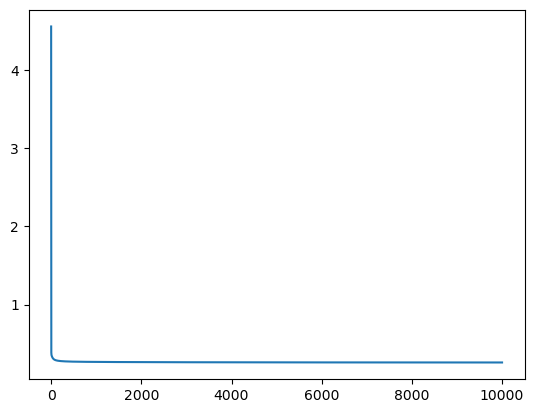

In [583]:
plt.plot(model3.loss)

In [584]:
import pickle
with open('pkl_file3', 'wb') as files:
    pickle.dump(model3, files)

In [585]:
with open('pkl_file3' , 'rb') as f:
    lr3 = pickle.load(f)

accuracy(test_y,lr3.predict(test_x))

0.86

# Best Model Parameters

In [589]:
model1.bi

[-0.002542204096210659,
 -0.005083935650023809,
 -0.007625187317765646,
 -0.010165951641590665,
 -0.012706221047763838,
 -0.015245987844919933,
 -0.01778524422229979,
 -0.020323982247963363,
 -0.02286219386697939,
 -0.025399870899591483,
 -0.027937005039360488,
 -0.030473587851282992,
 -0.03300961076988576,
 -0.035545065097296026,
 -0.03807994200128742,
 -0.04061423251330147,
 -0.04314792752644453,
 -0.04568101779345996,
 -0.04821349392467555,
 -0.05074534638592595,
 -0.05327656549645017,
 -0.055807141426763934,
 -0.058337064196506846,
 -0.060866323672264355,
 -0.06339490956536437,
 -0.06592281142964855,
 -0.06845001865921828,
 -0.07097652048615513,
 -0.07350230597821598,
 -0.07602736403650276,
 -0.07855168339310671,
 -0.08107525260872744,
 -0.08359806007026654,
 -0.08612009398839604,
 -0.08864134239510169,
 -0.09116179314120117,
 -0.0936814338938374,
 -0.096200252133947,
 -0.09871823515370412,
 -0.1012353700539398,
 -0.10375164374153706,
 -0.1062670429268019,
 -0.10878155412081054,
 -

In [596]:
model1.we

[array([0.99521622, 0.99882567, 0.99885875, 0.99868819, 0.99887888,
        0.99613319]),
 array([0.99043303, 0.99765149, 0.99771776, 0.99737656, 0.99775792,
        0.99226707]),
 array([0.98565045, 0.99647746, 0.99657703, 0.9960651 , 0.99663713,
        0.98840164]),
 array([0.98086849, 0.99530358, 0.99543658, 0.99475383, 0.9955165 ,
        0.98453693]),
 array([0.97608716, 0.99412986, 0.9942964 , 0.99344274, 0.99439603,
        0.98067295]),
 array([0.97130646, 0.9929563 , 0.99315649, 0.99213184, 0.99327574,
        0.97680969]),
 array([0.96652641, 0.99178289, 0.99201687, 0.99082114, 0.99215562,
        0.97294719]),
 array([0.96174702, 0.99060966, 0.99087753, 0.98951062, 0.99103567,
        0.96908544]),
 array([0.95696829, 0.98943658, 0.98973848, 0.98820031, 0.9899159 ,
        0.96522446]),
 array([0.95219025, 0.98826368, 0.98859973, 0.9868902 , 0.98879631,
        0.96136427]),
 array([0.94741291, 0.98709095, 0.98746127, 0.98558029, 0.98767691,
        0.95750487]),
 array([0.